

```
```

### 1.Install libraries needed

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
# Imports for Random Forest
from sklearn.ensemble import RandomForestRegressor

#Import for box plot
import matplotlib.pyplot as pl

from scipy.stats import pearsonr

# Imports for Support Vector Regression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR


# Imports for LSTM
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Importing required libraries for evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### 2.Load dataset

In [ ]:
df=pd.read_csv('/content/city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


### 3.Exaplanatory Data Analysis (EDA)

In [ ]:
#Quick info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
#Datatypes
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [ ]:
#Shape of dataset (Rows,Columns)
df.shape

(29531, 16)

In [ ]:
#Statistical Description of the data
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [ ]:
#Duplicates
df.duplicated().sum()

0

In [ ]:
#Null values
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

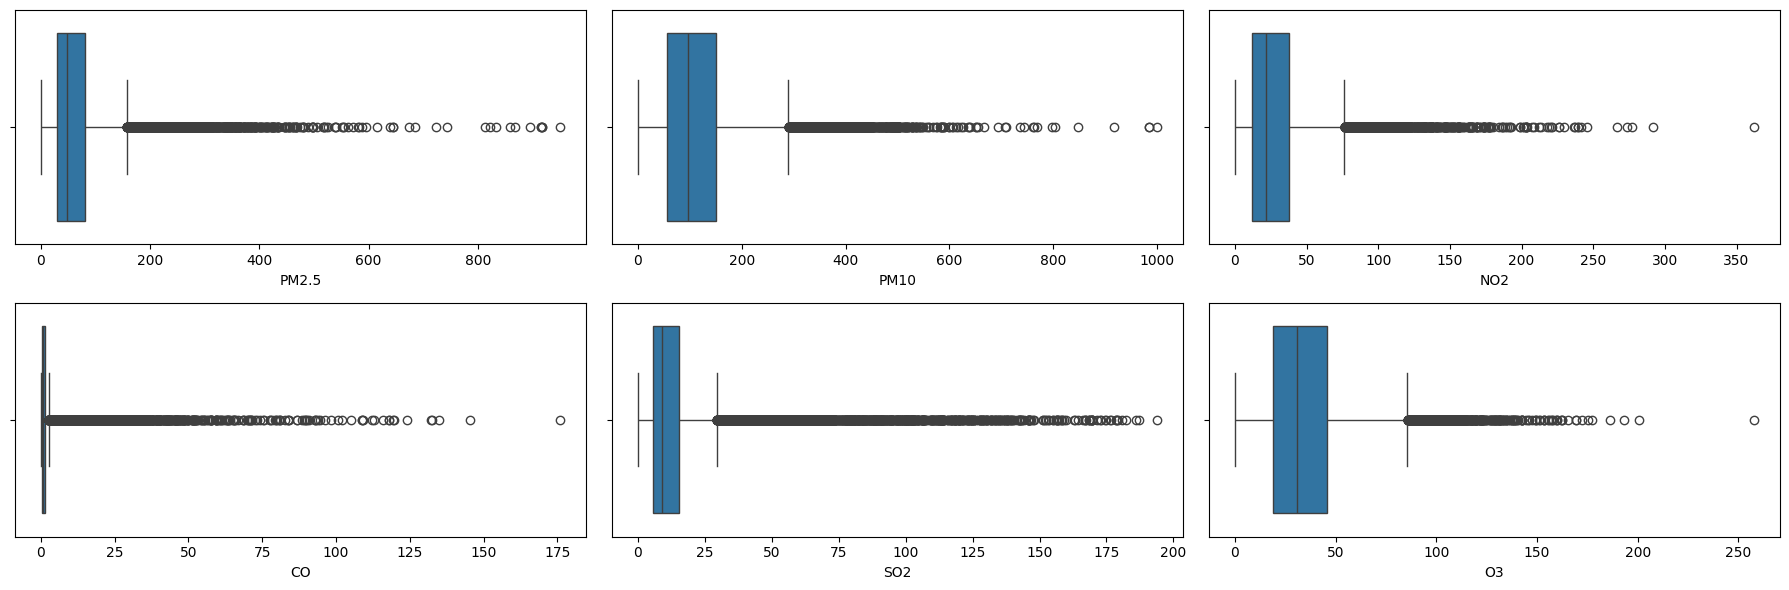

In [ ]:
#Identifying outliers with a BoxPlot
fig, axes = plt.subplots(2, 3, figsize=(18, 6))

sns.boxplot(x=df['PM2.5'], ax=axes[0, 0])
sns.boxplot(x=df['PM10'], ax=axes[0, 1])
sns.boxplot(x=df['NO2'], ax=axes[0, 2])
sns.boxplot(x=df['CO'], ax=axes[1, 0])
sns.boxplot(x=df['SO2'], ax=axes[1, 1])
sns.boxplot(x=df['O3'], ax=axes[1, 2])

plt.tight_layout()
plt.show()

In [ ]:
# Identifying outliers with a plot

# Specify the numerical columns you're interested in
numerical_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

# Calculate Q1, Q3, and IQR for each numerical feature
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Determine the indices of outliers for each feature
outlier_indices = []

for feature in numerical_columns:
    outlier_idx = df.index[(df[feature] < (Q1[feature] - 1.5 * IQR[feature])) |
                              (df[feature] > (Q3[feature] + 1.5 * IQR[feature]))].tolist()
    outlier_indices.extend(outlier_idx)

# Remove duplicates
unique_outlier_indices = list(set(outlier_indices))

# Extract rows that contain outliers
outlier_data = df.loc[unique_outlier_indices]

# Results
print(f"Identified {len(unique_outlier_indices)} unique rows with outliers.")
print("Rows containing outliers:")
print(outlier_data.to_string())

In [ ]:
#Features of the dataset
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene',
 'Xylene',
 'AQI']

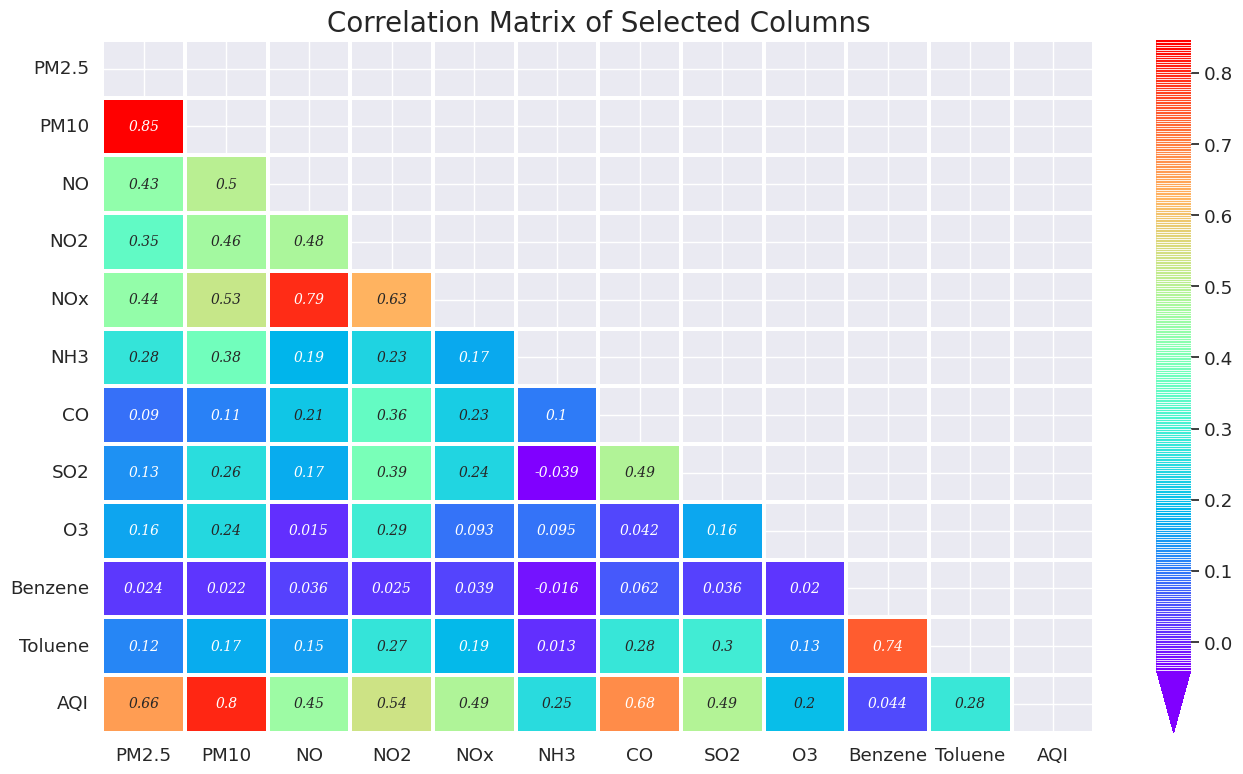

In [ ]:
# Define the columns you want to include in the correlation matrix
selected_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'AQI']

# Take only the selected columns from the DataFrame
selected_df = df[selected_columns]

# Define the figure size
plt.figure(figsize=(16, 9))

# Customize the annotation settings
annot_kws = {'fontsize': 10, 'fontstyle': 'italic', 'fontfamily': 'serif', 'alpha': 1}

# Customize the color bar settings
cbar_kws = {"shrink": 1, 'extend': 'min', 'extendfrac': 0.1, "drawedges": True}

# Take upper triangular correlation matrix
matrix = np.triu(selected_df.corr())

# Generate heatmap correlation
ax = sns.heatmap(selected_df.corr(), mask=matrix, cmap='rainbow', annot=True, linewidth=1.5, annot_kws=annot_kws, cbar_kws=cbar_kws)

# Set the title
plt.title('Correlation Matrix of Selected Columns', fontsize=20)

# Set the size of text
sns.set(font_scale=1.2)

plt.show()

In [ ]:
df.shape

(29531, 13)

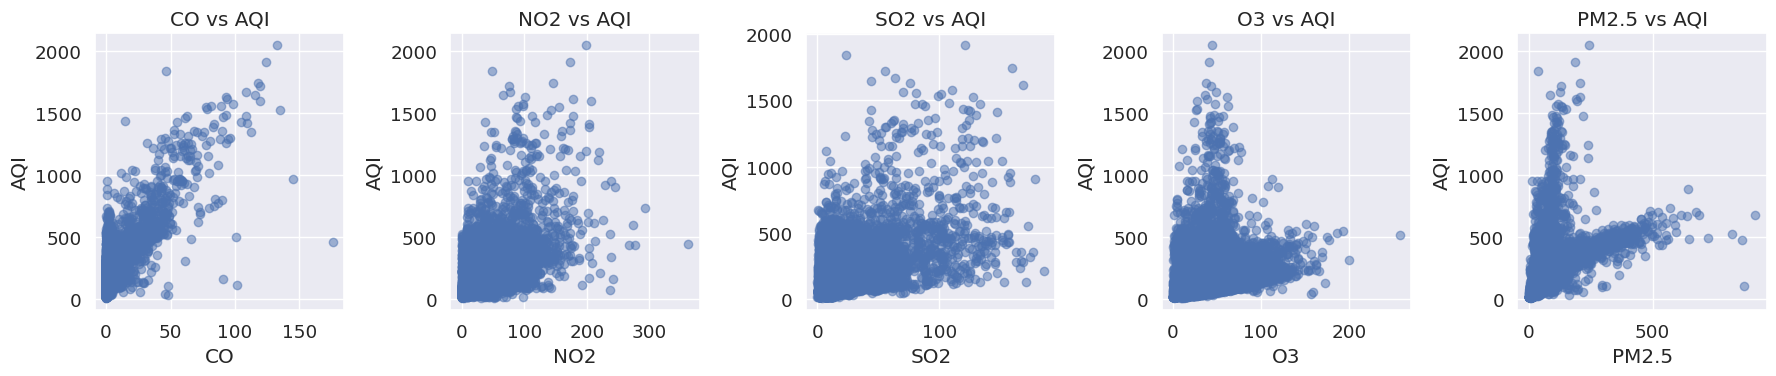

In [ ]:
# Define the columns and titles
scatter_columns = ['CO', 'NO2', 'SO2', 'O3', 'PM2.5']
titles = ['CO vs AQI', 'NO2 vs AQI', 'SO2 vs AQI', 'O3 vs AQI', 'PM2.5 vs AQI']

# Create subplots
fig, axes = plt.subplots(1, len(scatter_columns), figsize=(18, 4))

# Iterate through columns and plot scatter plots
for i, column in enumerate(scatter_columns):
    axes[i].scatter(df[column], df['AQI'], alpha=0.5)  # Set alpha value to adjust transparency
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('AQI')
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

### 4.Data Cleaning


In [ ]:
# Dropping feature AQI_Bucket since we will be doing regression
df.drop(columns=['AQI_Bucket'], inplace=True)

# Dropping date and city
df.drop(columns=['City', 'Date'], inplace=True)




In [ ]:
#Removing Outliers
def remove_outliers_iqr(df, columns, multiplier=4):
    for column in columns:
        q25, q75 = df[column].quantile(0.25), df[column].quantile(0.75)
        iqr = q75 - q25
        cut_off = iqr * multiplier
        lower_bound, upper_bound = q25 - cut_off, q75 + cut_off
        # Identify indices of rows with outliers
        outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
        # Drop rows with outliers
        df.drop(outlier_indices, inplace=True)

# Example usage:
# Remove outliers using IQR method for the specified columns
remove_outliers_iqr(df, columns=['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene'])

In [ ]:
df.shape

(24579, 13)

In [ ]:
# Handling Null values of numerical data using mean for original DataFrame
pmean = df["PM2.5"].mean()
df["PM2.5"].fillna(pmean, inplace=True)

pmmean = df["PM10"].mean()
df["PM10"].fillna(pmmean, inplace=True)

nmean = df["NO"].mean()
df["NO"].fillna(nmean, inplace=True)

nomean = df["NO2"].mean()
df["NO2"].fillna(nomean, inplace=True)

noxmean = df["NOx"].mean()
df["NOx"].fillna(noxmean, inplace=True)

nhmean = df["NH3"].mean()
df["NH3"].fillna(nhmean, inplace=True)

cmean = df["CO"].mean()
df["CO"].fillna(cmean, inplace=True)

smean = df["SO2"].mean()
df["SO2"].fillna(smean, inplace=True)

omean = df["O3"].mean()
df["O3"].fillna(omean, inplace=True)

bmean = df["Benzene"].mean()
df["Benzene"].fillna(bmean, inplace=True)

tmean = df["Toluene"].mean()
df["Toluene"].fillna(tmean, inplace=True)

xmean = df["Xylene"].mean()
df["Xylene"].fillna(xmean, inplace=True)

amean = df["AQI"].mean()
df["AQI"].fillna(amean, inplace=True)

# Handling Null labels of categorical data with the mode for original DataFrame
df.fillna(df.mode().iloc[0], inplace=True)

#Checking Null values again
df.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

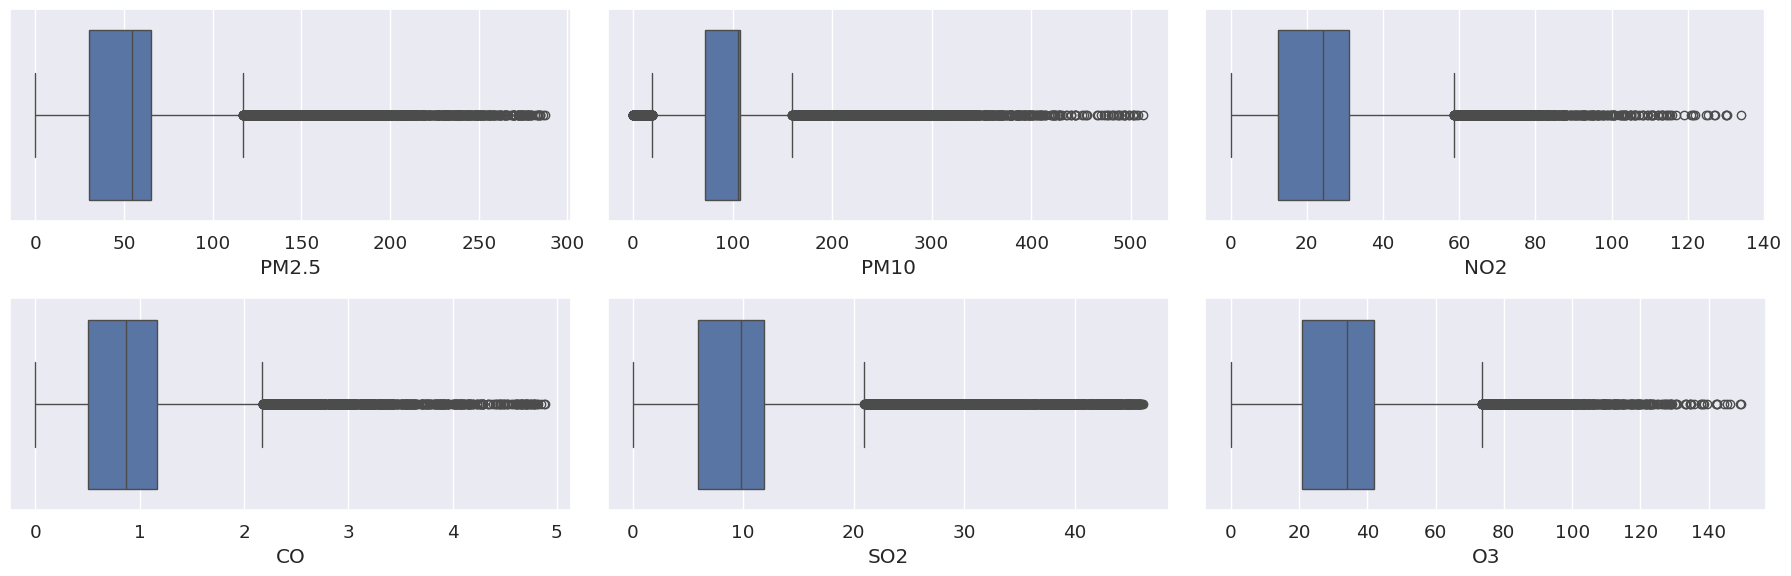

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 6))

sns.boxplot(x=df['PM2.5'], ax=axes[0, 0])
sns.boxplot(x=df['PM10'], ax=axes[0, 1])
sns.boxplot(x=df['NO2'], ax=axes[0, 2])
sns.boxplot(x=df['CO'], ax=axes[1, 0])
sns.boxplot(x=df['SO2'], ax=axes[1, 1])
sns.boxplot(x=df['O3'], ax=axes[1, 2])

plt.tight_layout()
plt.show()

### 5. Preprocessing

In [ ]:
#Defining features and target variables
X = df[['PM2.5','NO2', 'CO', 'SO2', 'O3']]
y = df['AQI']

In [ ]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the transformation on the training features
X_train_transformed = np.log(X_train + 1e-6)

# Transform the test features using the same transformation parameters
X_test_transformed = np.log(X_test + 1e-6)

y_train_transformed = np.log(y_train + 1e-6)
y_test_transformed = np.log(y_test + 1e-6)

In [ ]:
# Feature Scaling
# Feature scaling for feature variables (X)
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Feature scaling for target variable (y)
# Convert y_train and y_test to NumPy arrays
y_train_array = y_train.to_numpy().ravel()
y_test_array = y_test.to_numpy().ravel()

# Feature scaling for target variable (y)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_array.reshape(-1, 1))  # Reshape y_train_array to 2D array
y_test_scaled = scaler_y.transform(y_test_array.reshape(-1, 1))        # Reshape y_test_array to 2D array

### 6.RF


In [ ]:
#RF
RFR = RandomForestRegressor(random_state = 90)
#Fitting
RFR.fit(X_train_transformed, y_train_transformed)

RandomForestRegressor(random_state=90)

In [ ]:
#RF Prediciton
y_predict = RFR.predict(X_test_transformed)

In [ ]:
# Mean Absolute Error
MAE = mean_absolute_error(y_test_transformed, y_predict)
print('Mean Absolute Error:', MAE)
MSE = mean_squared_error(y_test_transformed, y_predict)
print('Mean Squared Error:', MSE)
r2 = r2_score(y_test_transformed, y_predict)
print('R2 Score:', r2)

Mean Absolute Error: 0.14872618118999287
Mean Squared Error: 0.050018701952171
R2 Score: 0.8163292441188451


In [ ]:
#10 folds Cross-Validation to get overall performance of the model
# Use scoring='neg_mean_absolute_error' for Mean Absolute Error (MAE)
# Define the metrics you want to calculate during cross-validation
# Define the metrics you want to calculate during cross-validation
scoring = {'mae': 'neg_mean_absolute_error',
           'mse': 'neg_mean_squared_error',
           'r2': 'r2'}

# Perform cross-validation with 10 folds
# Replace X_train and y_train with your training data and target variable
cv_results = cross_validate(RFR, X_train_transformed, y_train_transformed, cv=10, scoring=scoring)

# Extract and print the mean scores for each metric
mean_mae = -cv_results['test_mae'].mean()
mean_mse = -cv_results['test_mse'].mean()
mean_r2 = cv_results['test_r2'].mean()

print(f"Mean Absolute Error (MAE): {mean_mae:.2f}")
print(f"Mean Squared Error (MSE): {mean_mse:.2f}")
print(f"R-squared (R2): {mean_r2:.2f}")

Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.05
R-squared (R2): 0.82


### 7.SVR

In [ ]:
# Define the pipeline with SVR
pipeline = Pipeline([
    ('svr', SVR())
])

# Define the parameter grid for grid search
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__gamma': ['scale', 'auto'],
    'svr__epsilon': [0.1, 0.5, 1]
}

# Define the number of folds for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_transformed, y_train_transformed)

# Print the best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (MSE):", -grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_transformed)
test_mse = mean_squared_error(y_test_transformed, y_pred)
test_r2 = r2_score(y_test_transformed, y_pred)
test_mae = mean_absolute_error(y_test_transformed, y_pred)

print("Test set score (MAE):", test_mae)
print("Test set score (MSE):", test_mse)
print("Test set score (R^2):", test_r2)




Best parameters: {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 'auto'}
Best cross-validation score (MSE): 0.05642718028402457
Test set score (MAE): 0.1614964277073329
Test set score (MSE): 0.055384517339975375
Test set score (R^2): 0.7966257466322618


In [ ]:
# Define the SVR model with the best parameters
best_svr = SVR(C=10, epsilon=0.1, gamma='auto')

# Train the SVR model
best_svr.fit(X_train_transformed, y_train_transformed)

# Make predictions on the test set
y_pred = best_svr.predict(X_test_transformed)

# Evaluate the model
mse = mean_squared_error(y_test_transformed, y_pred)
r2 = r2_score(y_test_transformed, y_pred)
mae = mean_absolute_error(y_test_transformed, y_pred)

print("Test set score (MAE):", mae)
print("Test set score (MSE):", mse)
print("Test set score (R^2):", r2)


Test set score (MAE): 0.1614964277073329
Test set score (MSE): 0.055384517339975375
Test set score (R^2): 0.7966257466322618
